# GP08 GeoPandas
GeoPandas Full Documentation: https://geopandas.org/en/stable/docs.html

Spatial Reference: https://spatialreference.org/
___
## 13. Choropleth Maps
* A type of thematic map that is used to represent statistical data using the colour mapping symbology technique. 
* It displays enumeration units, or divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable.
* The colours used corresponds with an aggregate summary of a geographic characteristic within spatial enumeration units.
* Plotting a chocopleth map requires the library, mapclassify. It implements a family of classification schemes for choropleth maps.
* Advantage: Densities or ratios of quantites can be represented by colours.
* Disadvantage: Data can be generalised into large areas due to visual tendencies.

In [1]:
# Library import + Data Load
import geopandas as gpd
import matplotlib.pyplot as plt

sa = gpd.read_file("localdata/malmo-pop.shp")
sa.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,...,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,...,99.0,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,"POLYGON ((373380.287 6160661.365, 373382.480 6..."
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,...,140.0,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,"POLYGON ((372667.079 6159991.971, 372653.152 6..."
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,...,71.0,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,"POLYGON ((372812.733 6158498.565, 372817.194 6..."
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,...,108.0,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,"POLYGON ((374168.622 6160181.233, 374169.100 6..."
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,...,113.0,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,"POLYGON ((375219.802 6160462.505, 375274.357 6..."


* Display the column names from the dataset

In [2]:
sa.columns

Index(['fid', 'Deso', 'Age_5', 'Age6_9', 'Age10_15', 'Age16_19', 'Age20_24',
       'Age25_29', 'Age30_34', 'Age35_39', 'Age40_44', 'Age45_49', 'Age50_54',
       'Age55_59', 'Age60_64', 'Age65_69', 'Age70_74', 'Age75_79', 'Age80_w',
       'Total', 'geometry'],
      dtype='object')

* Choropleth map plotting requires data points from a column. *Note: This column has raw data that has not taken the total population into account.

<Axes: >

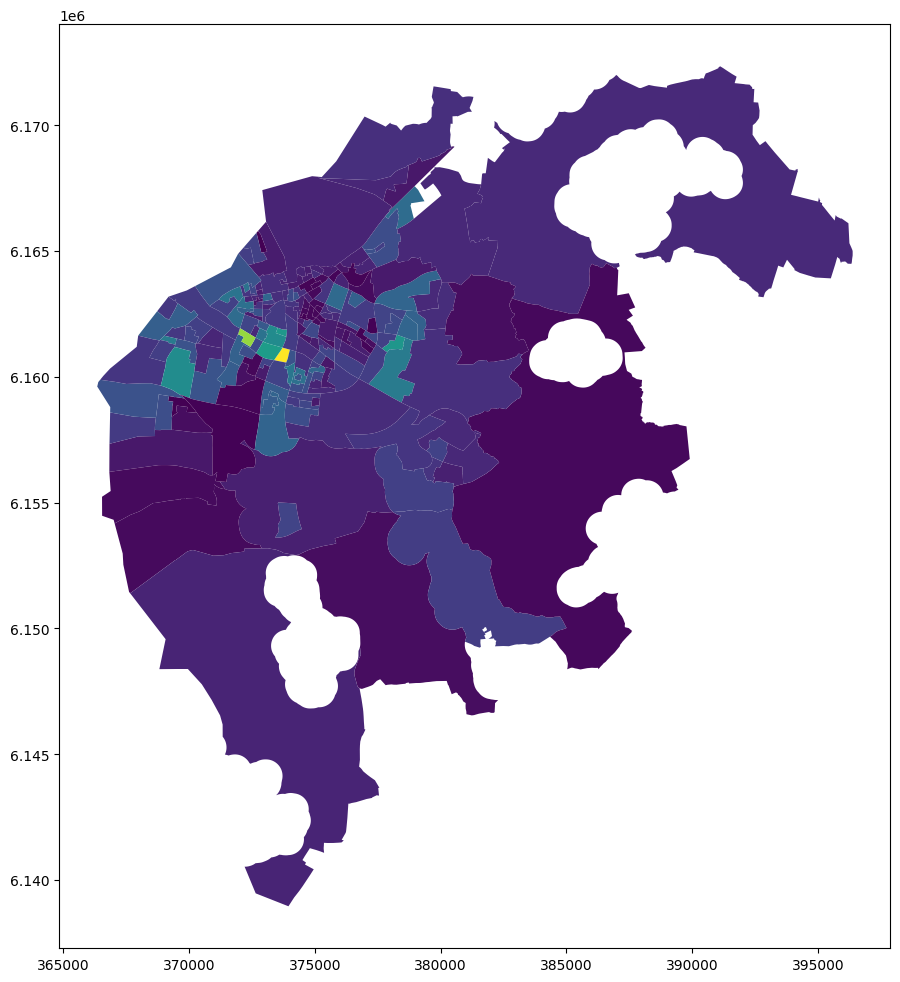

In [2]:
sa.plot(column='Age80_w', figsize=(12,12))

* Use of parameters inclduing colour maps, schema (from the library, mapclassify), k (the number of classes), etc.

<Axes: >

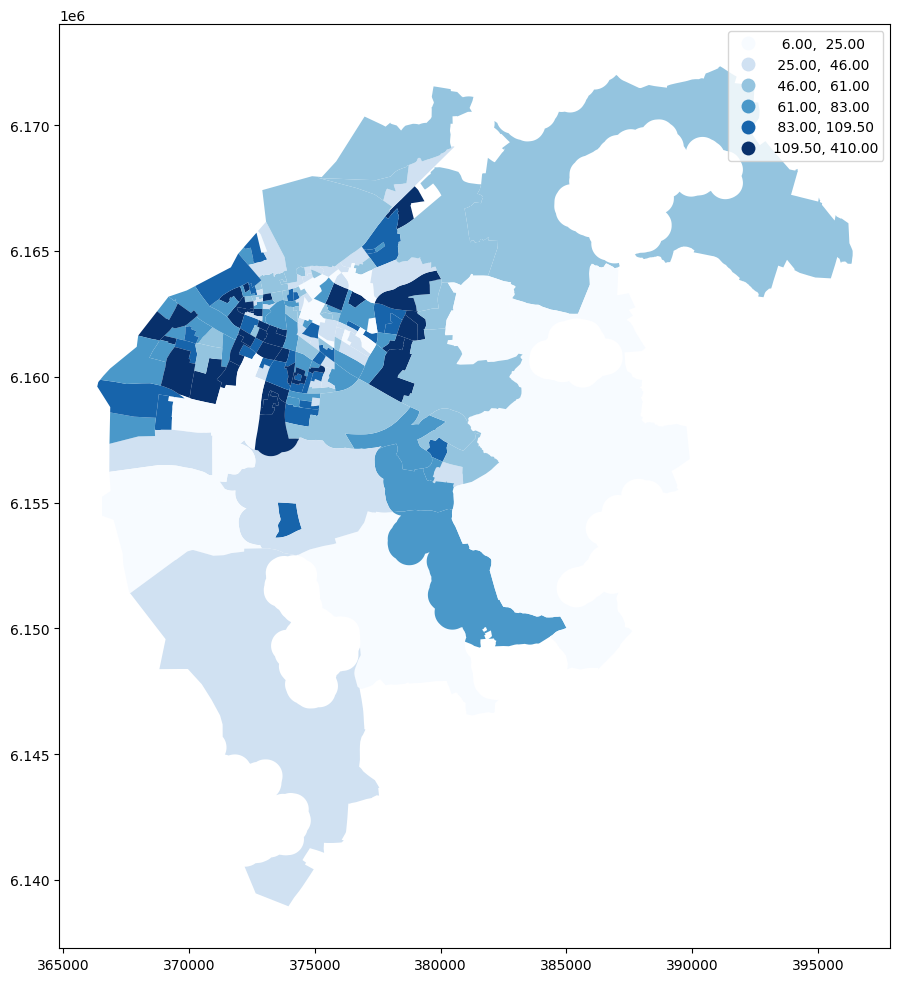

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
sa.plot(ax=ax, column='Age80_w', cmap="Blues", scheme="quantiles", k=6, legend=True)

* A different schema and number of classes used.

c:\Users\likre\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\plotting.py:777: UserWarning: Numba not installed. Using slow pure python version.
  binning = mapclassify.classify(


<Axes: >

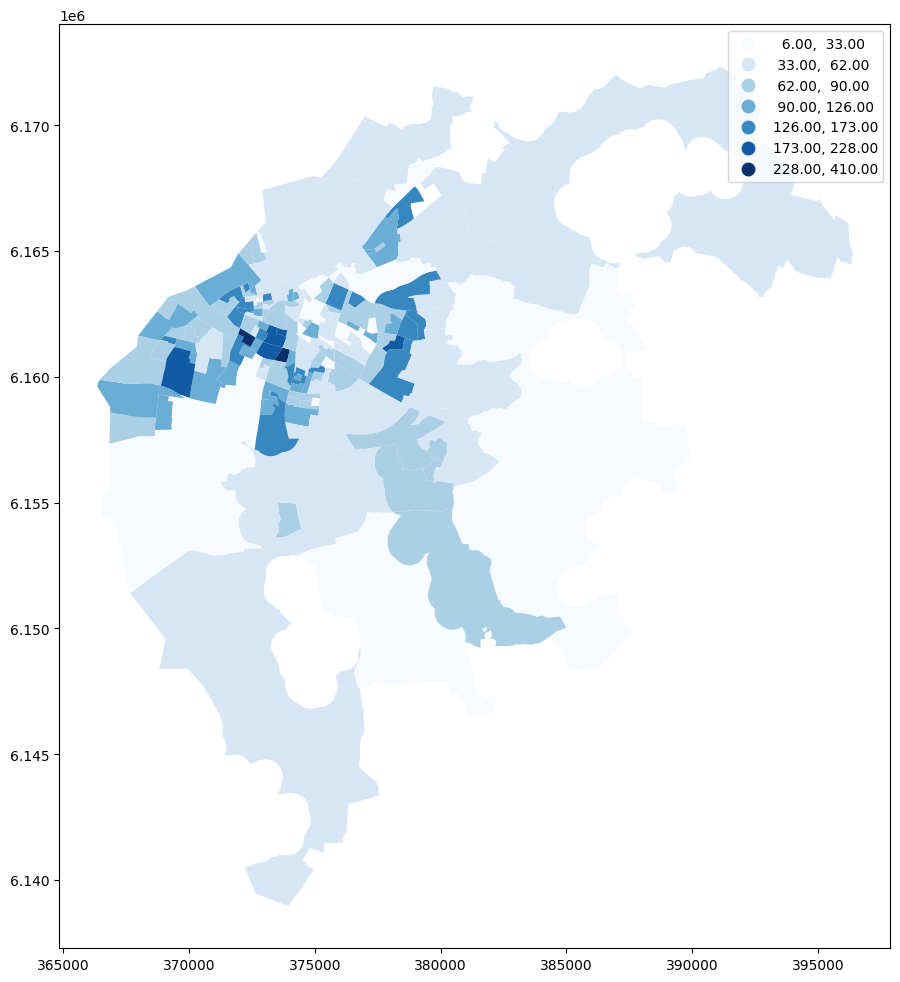

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
sa.plot(ax=ax, column='Age80_w', cmap="Blues", scheme='FisherJenks', k=7, legend=True)

* Normalised Data: Accounting the total population and derived percentages.

In [22]:
sa["Age80p"] = (sa['Age80_w'] / sa["Total"])*100
sa["Age80p"]

0      19.931940
1       1.337920
2       7.193396
3       4.626866
4       1.659751
         ...    
197     1.081359
198     6.577225
199     0.809353
200     8.840864
201     2.761104
Name: Age80p, Length: 202, dtype: float64

* Replot with the normalised data

<Axes: >

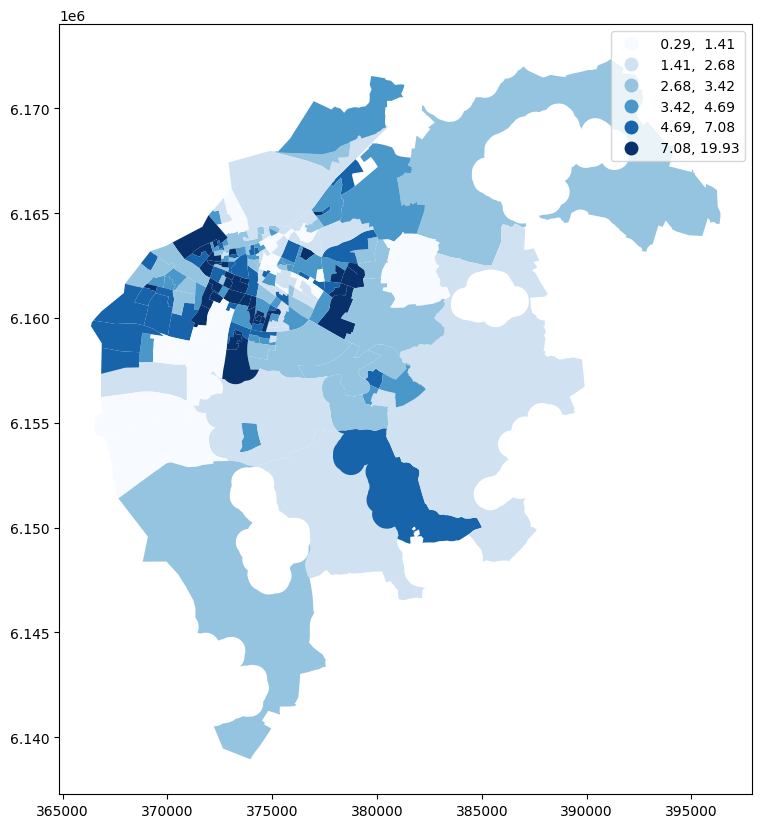

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
sa.plot(column='Age80p', cmap="Blues", scheme="quantiles", k=6, ax=ax, legend=True)

* Side by side plotting

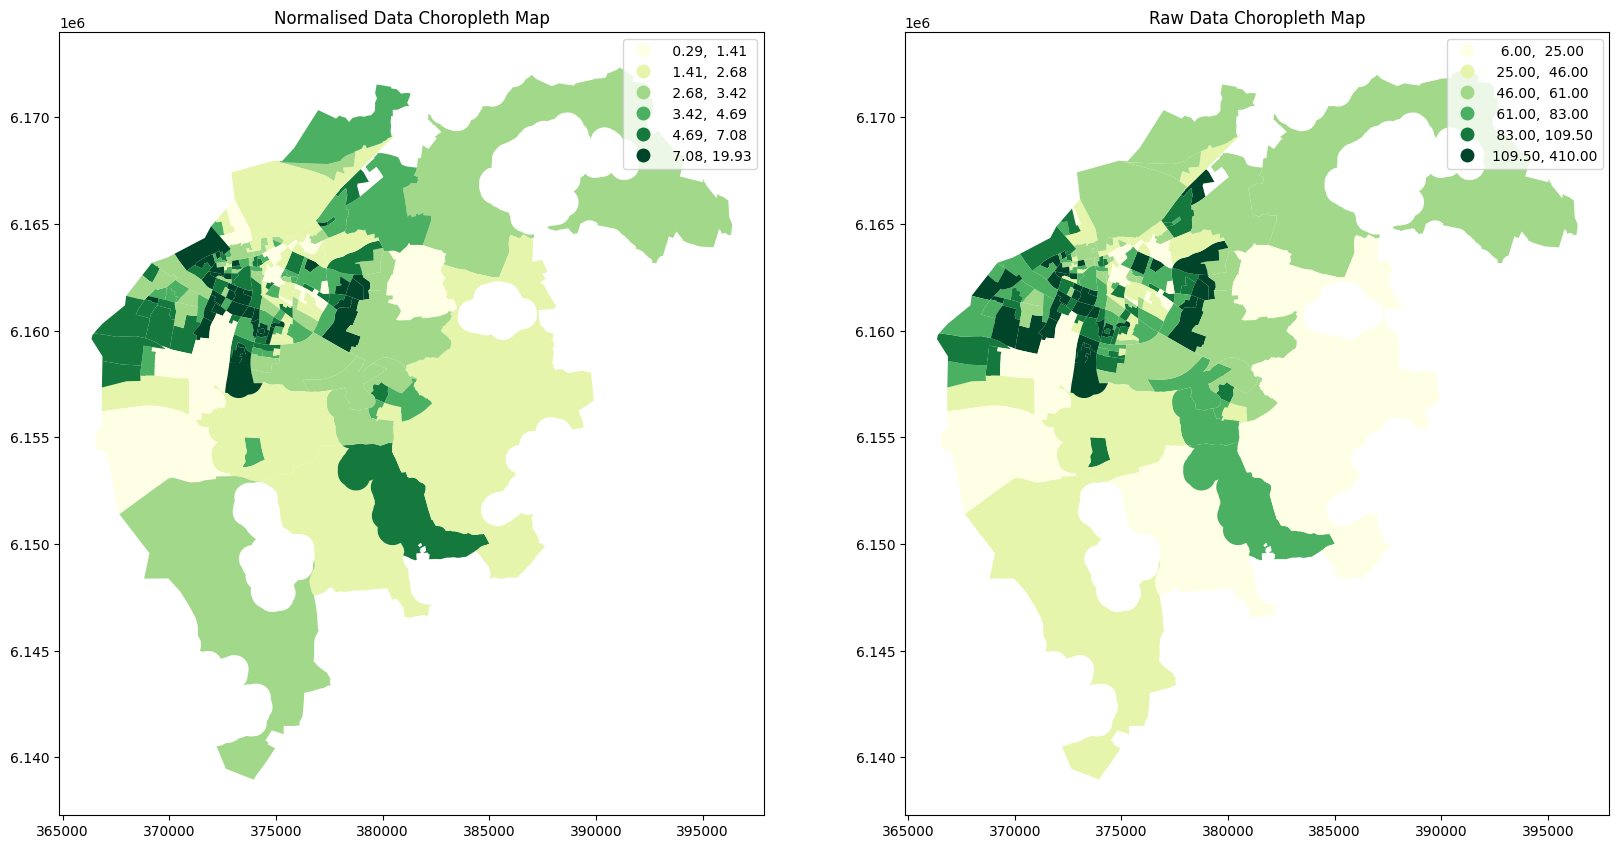

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
sa.plot(column='Age80p', cmap="YlGn", scheme="quantiles", k=6, ax=ax[0], legend=True)
ax[0].set_title("Normalised Data Choropleth Map")
sa.plot(column='Age80_w', cmap="YlGn", scheme="quantiles", k=6, ax=ax[1], legend=True)
ax[1].set_title("Raw Data Choropleth Map")
plt.show()

___
## 14. Bubble Maps
* Bubble map use circles as an encoding variable and the circle size represents a numeric value of a geographical area.
* Point geometries representing data points are important as they are the centre of circle representations.

In [22]:
# Create a replicate of the population dataset for applying centroid (POINT geometry)
sap = sa.copy()
sap['geometry'] = sap['geometry'].centroid
sap.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,...,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry,Age80_perc,Age80p
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,...,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,POINT (373736.130 6160844.324),19.931940,19.931940
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,...,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,POINT (372932.457 6160165.211),1.337920,1.337920
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,...,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,POINT (373183.207 6158866.154),7.193396,7.193396
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,...,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,POINT (374515.204 6160556.319),4.626866,4.626866
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,...,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,POINT (375533.769 6160531.143),1.659751,1.659751


* A plot with a fixed marker size (i.e. cannot be used for representation since all circle sizes are now the same).

<Axes: >

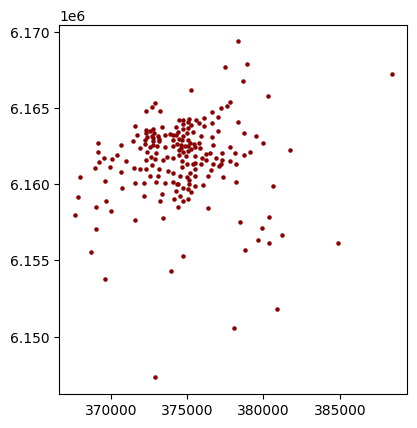

In [38]:
sap.plot(color="darkred", markersize=5)

* Bubble maps require the use of column data for the markersize parameter. Thus, creating the differences in representation.

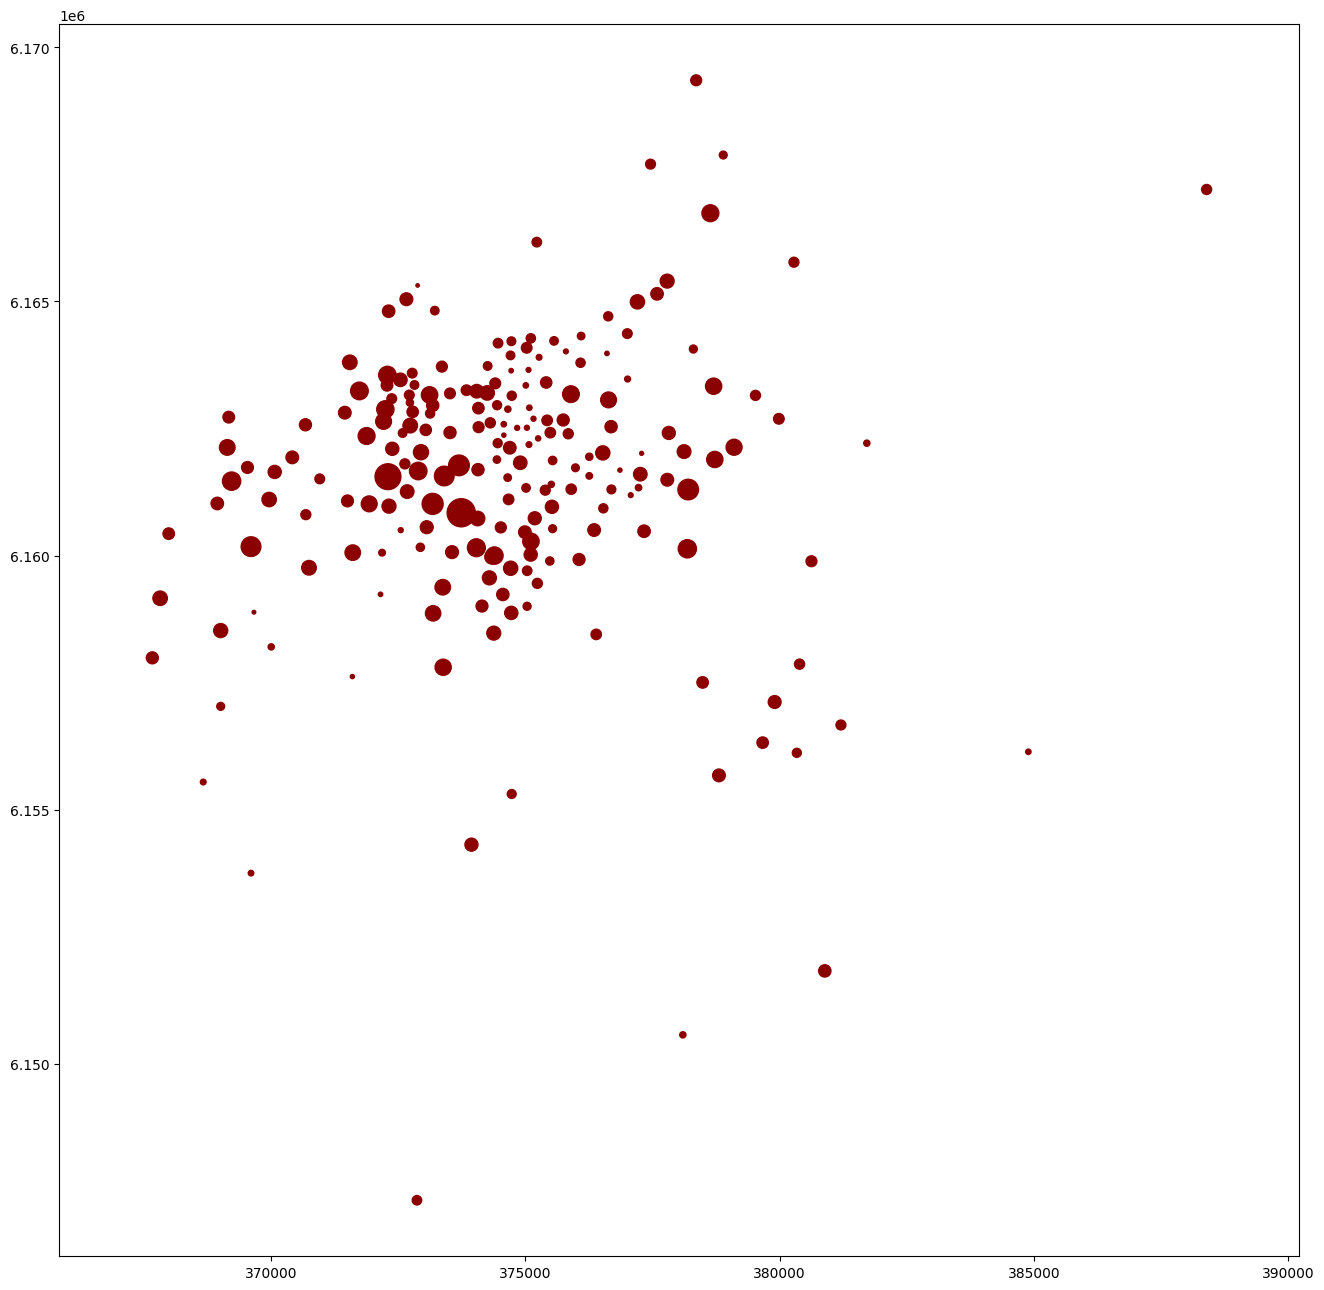

In [37]:
fig, ax = plt.subplots(figsize=(16,16))
sap.plot(ax=ax,color="darkred", markersize="Age80_w")
#ax.axis("off")
plt.axis('equal')
plt.show()

* Overlaying the original population dataset plot with the bubble map plot

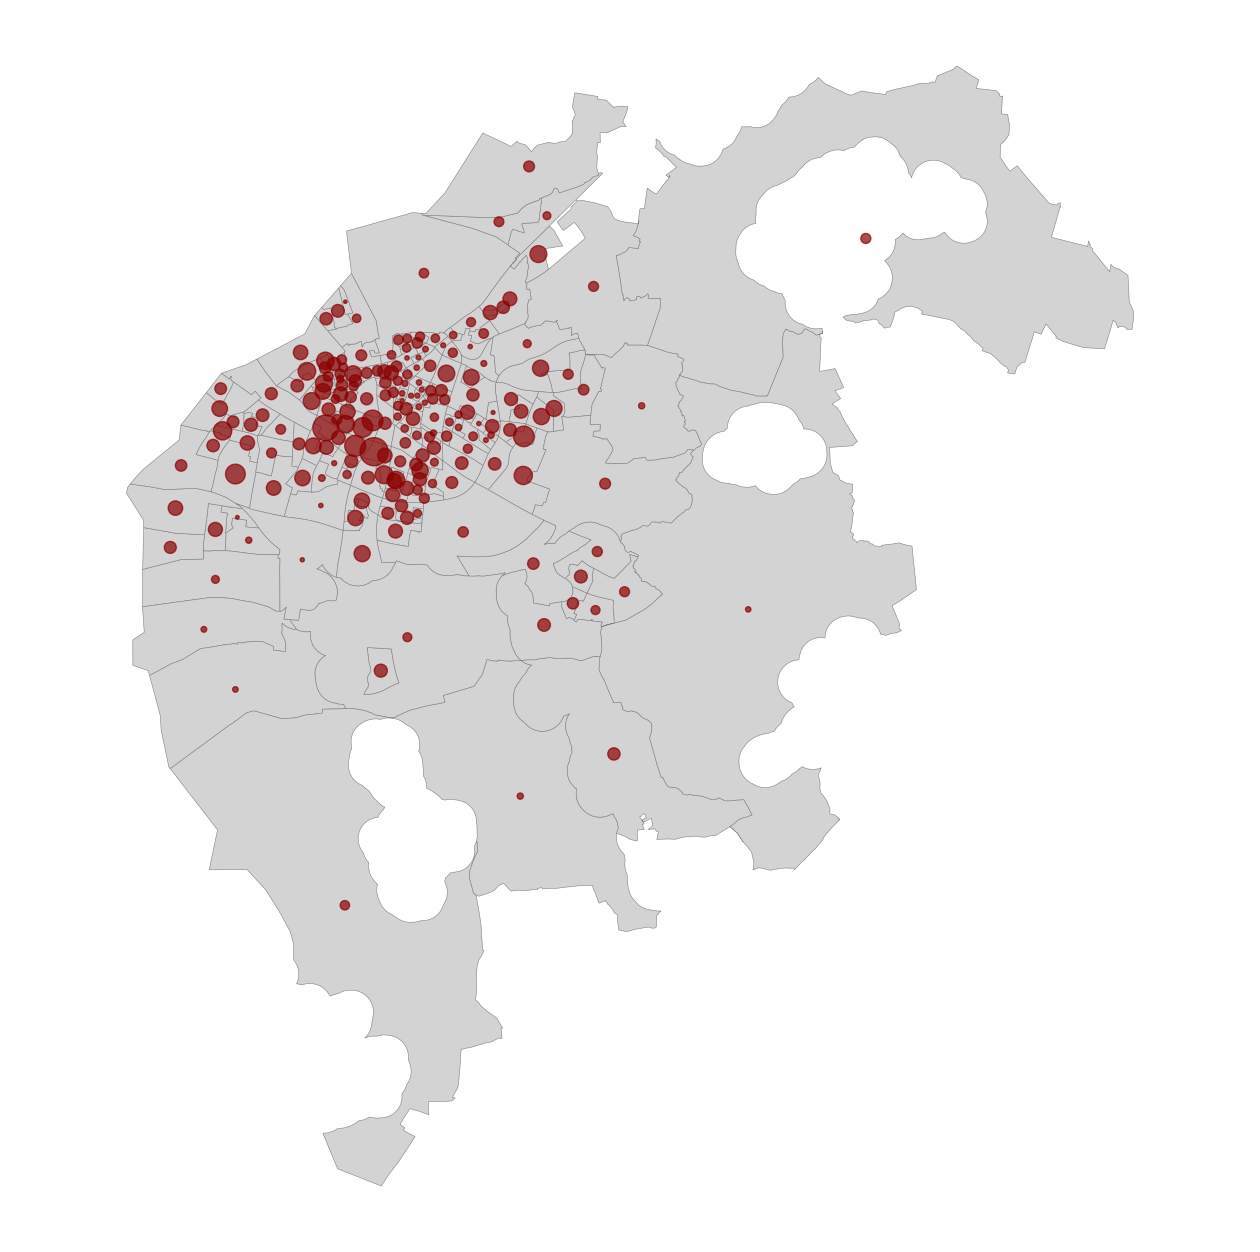

In [36]:
fig, ax = plt.subplots(figsize=(16,16))
sa.plot(ax=ax, color="lightgrey", edgecolor="grey", linewidth=0.4)
sap.plot(ax=ax,color="darkred", markersize="Age80_w",alpha=0.7, categorical=False, legend=True)
ax.axis("off")
plt.axis('equal')
plt.show()

___